In [121]:
import pandas as pd
import numpy as np

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load the Excel file into a DataFrame
#csv_path = "priceData_last100000rows.csv"
#data = pd.read_csv(csv_path, sep = ";")

# Display the first few rows of the dataframe to understand its structure
#data.head()

In [123]:
# DATABASE BAĞLANTI 

from sqlalchemy import create_engine

user = 'lydiausr'
password = 'lydia2024!'
host = '10.255.0.230'
port = '5432'
db = 'lydia'
connection_string = f"postgresql://{user}:{password}@{host}:{port}/{db}"
engine = create_engine(connection_string)



In [124]:
#SQL SELECT

query ="SELECT * FROM airo.daily_price WHERE deptime >= '2024-01-01 00:00:00' AND addedtodownloadqueue >='2024-01-05 00:00:00';"
data = pd.read_sql(query, engine)


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336578 entries, 0 to 336577
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   screenroute           336578 non-null  object
 1   addedtodownloadqueue  336578 non-null  object
 2   begdownload           336578 non-null  object
 3   enddownload           336578 non-null  object
 4   recordroute           336578 non-null  object
 5   flightno              336578 non-null  object
 6   classavailable        336578 non-null  object
 7   deptime               336578 non-null  object
 8   arrtime               336578 non-null  object
 9   flightminutes         336578 non-null  object
 10  brand                 336578 non-null  object
 11  price                 336578 non-null  object
dtypes: object(12)
memory usage: 30.8+ MB


In [126]:
data_3 = data.groupby (["begdownload",'deptime','recordroute',"flightno"])['price'].min().reset_index()

In [127]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84134 entries, 0 to 84133
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   begdownload  84134 non-null  datetime64[ns]
 1   deptime      84134 non-null  datetime64[ns]
 2   recordroute  84134 non-null  object        
 3   flightno     84134 non-null  object        
 4   price        84134 non-null  object        
 5   coll_date    84134 non-null  datetime64[ns]
 6   dep_date     84134 non-null  object        
 7   dep_time     84134 non-null  object        
 8   Prefix       84134 non-null  object        
 9   Number       84134 non-null  object        
 10  Org          84134 non-null  object        
 11  Dest         84134 non-null  object        
 12  ond          84134 non-null  object        
dtypes: datetime64[ns](3), object(10)
memory usage: 8.3+ MB


In [103]:
# TARİH DÖNÜŞÜMLERİ
data_copy['begdownload'] = pd.to_datetime(data_copy['begdownload'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
data_copy['deptime'] = pd.to_datetime(data_copy['deptime'], format = "%Y-%m-%d %H:%M:%S" , errors='coerce')



In [104]:
data_copy['deptime']

0       2024-01-05 01:25:00
1       2024-01-05 06:10:00
2       2024-01-05 09:15:00
3       2024-01-05 10:40:00
4       2024-01-05 10:55:00
                ...        
84129   2024-01-06 16:30:00
84130   2024-01-06 17:15:00
84131   2024-01-06 18:20:00
84132   2024-01-06 18:35:00
84133   2024-01-06 19:05:00
Name: deptime, Length: 84134, dtype: datetime64[ns]

In [105]:
#COLL_DATE KOLONUNU BELIRLENMESI ( addedtodownloadqueue OLARAK SEÇTİM ANCAK  begdownload veya enddownload olarak da bakılabilir!)

data_copy["coll_date"]= data_copy["begdownload"]

In [106]:
#SAAT VE TARIH BILGILERININ FARKLI IKI KOLON OLARAK OLUSTURULMASI
data_copy["dep_date"]= data_copy["deptime"].dt.date
data_copy["dep_time"]= data_copy["deptime"].dt.time

In [107]:
# FLIGHT NO - ORG-DEST KOLONLARININ OLUSTURULMASI 
data_copy['Prefix'] = data_copy['flightno'].str.slice(0, 2)  # Gets the first 2 character
data_copy['Number'] = data_copy['flightno'].str.slice(3)     # Gets the rest of the characters from the second character onwards
data_copy['Org'] = data_copy['recordroute'].str.slice(0,3)
data_copy['Dest'] = data_copy['recordroute'].str.slice(3,6)
data_copy['ond'] = data_copy['Org'] +'-'+ data_copy['Dest']

In [109]:
#df_grouped_3 = df_3.groupby (["ond",'dep_date','Prefix',"Number"])['price'].min().reset_index()

data_copy.columns

Index(['begdownload', 'deptime', 'recordroute', 'flightno', 'price',
       'coll_date', 'dep_date', 'dep_time', 'Prefix', 'Number', 'Org', 'Dest',
       'ond'],
      dtype='object')

In [111]:
# FAZLA KOLONLARIN KALDIRILMASI
columns_to_drop = ['begdownload', 'deptime','recordroute','flightno']
df = data_copy.drop(columns=columns_to_drop)

In [112]:
df.head()

,price,coll_date,dep_date,dep_time,Prefix,Number,Org,Dest,ond
0,114684,2024-01-05 00:03:23.540,2024-01-05,01:25:00,N4,555,MOW,VRA,MOW-VRA
1,6585,2024-01-05 00:03:25.637,2024-01-05,06:10:00,SU,1009,KGD,MOW,KGD-MOW
2,6585,2024-01-05 00:03:25.637,2024-01-05,09:15:00,SU,1001,KGD,MOW,KGD-MOW
3,46274,2024-01-05 00:03:25.637,2024-01-05,10:40:00,DP,6836,KGD,MOW,KGD-MOW
4,12557,2024-01-05 00:03:25.637,2024-01-05,10:55:00,U6,698,KGD,MOW,KGD-MOW


In [113]:
df_3 = df[(df["coll_date"] >= "2024-01-05") & (df["ond"] == "AER-KZN")]

In [115]:
df_3.to_excel("df_3_v2.xlsx")

In [78]:
df_grouped_3 = df_3.groupby (["ond",'dep_date','Prefix',"Number"])['price'].min().reset_index()

KeyError: 'coll_date'

In [79]:
df_grouped_3.to_excel("df_3_veri.xlsx", index = False)

In [13]:
# SEFER KALKIS SAATLERINI TOD ILE GRUPLANDIRMA 

df['dep_time'] = pd.to_datetime(df['dep_time'], format='%H:%M:%S')

# HHMM formatında yeni bir sütun oluştur
df['dep_time_HHMM'] = df['dep_time'].dt.hour*100 + df['dep_time'].dt.minute

# Şimdi label_flight fonksiyonunu kullanarak etiketleme yapabiliriz
def label_flight(dep_time):
    if 500 <= dep_time <= 1000:
        return "0500-1000"
    elif 1001 <= dep_time <= 1400:
        return "1001-1400"
    elif 1401 <= dep_time <= 1700:
        return "1401-1700"
    elif 1701 <= dep_time <= 2100:
        return "1701-2100"
    else:  # Saat 2101 ile 0459 arasında olanlar
        return "2101-0459"

# 'dep_time_HHMM' sütununu kullanarak yeni bir 'label' sütunu oluştur
df['TOD'] = df['dep_time_HHMM'].apply(label_flight)

# Gereksiz sütunları kaldırabilirsiniz
df = df.drop('dep_time_HHMM', axis=1)

# Sonuçları göster

df.head()


,classavailable,brand,price,coll_date,dep_date,dep_time,Prefix,Number,Org,Dest,ond,TOD
0,H9,PR,13717,NaT,NaT,NaT,U6,74,KGD,MOW,KGD-MOW,2101-0459
1,B9,ËÀÉÒ,15478,NaT,NaT,NaT,Y7,321,KJA,AER,KJA-AER,2101-0459
2,M9,PR,12557,NaT,NaT,NaT,U6,628,KGD,MOW,KGD-MOW,2101-0459
3,M5,PR,12557,NaT,NaT,NaT,U6,372,KGD,MOW,KGD-MOW,2101-0459
4,K9,PR,10477,NaT,NaT,NaT,U6,74,KGD,MOW,KGD-MOW,2101-0459


In [14]:
df.shape

(336578, 12)

In [15]:
# Ay ve Dow bilgisi ekleme
df['dep_date'] = pd.to_datetime(df['dep_date'])
# Extract month and day of week from 'Dep_Date' and create new columns in the DataFrame
df['Dep_Month'] = df['dep_date'].dt.month
df['Dep_DayOfWeek'] = df['dep_date'].dt.day_name()

# Display the first few rows of the dataframe to confirm the new columns are added
df.head()

,classavailable,brand,price,coll_date,dep_date,dep_time,Prefix,Number,Org,Dest,ond,TOD,Dep_Month,Dep_DayOfWeek
0,H9,PR,13717,NaT,NaT,NaT,U6,74,KGD,MOW,KGD-MOW,2101-0459,NaN,NaN
1,B9,ËÀÉÒ,15478,NaT,NaT,NaT,Y7,321,KJA,AER,KJA-AER,2101-0459,NaN,NaN
2,M9,PR,12557,NaT,NaT,NaT,U6,628,KGD,MOW,KGD-MOW,2101-0459,NaN,NaN
3,M5,PR,12557,NaT,NaT,NaT,U6,372,KGD,MOW,KGD-MOW,2101-0459,NaN,NaN
4,K9,PR,10477,NaT,NaT,NaT,U6,74,KGD,MOW,KGD-MOW,2101-0459,NaN,NaN


In [16]:
df_grouped = df.groupby (["ond",'dep_date', 'TOD', 'Prefix','Dep_Month', 'Dep_DayOfWeek'])['price'].min().reset_index()
df_grouped['dep_date'] = pd.to_datetime(df_grouped['dep_date'])
order = ["ond","dep_date", "Prefix", 'TOD', 'price','Dep_Month', 'Dep_DayOfWeek']
df_grouped = df_grouped[order]
df_grouped["price"]= pd.to_numeric(df_grouped["price"],errors ='coerce')


In [17]:
df_grouped.head()

,ond,dep_date,Prefix,TOD,price,Dep_Month,Dep_DayOfWeek


In [34]:
# Now proceed with your groupby and aggregation
price_stats_with_date = df_grouped.groupby(['ond', 'dep_date','TOD', 'Dep_Month', 'Dep_DayOfWeek'])['price'].agg(['mean', 'max', 'min']).reset_index()

# Show the result
price_stats_with_date.head()


,ond,dep_date,TOD,Dep_Month,Dep_DayOfWeek,mean,max,min
0,AER-BAX,2024-01-05,2101-0459,1,Friday,46883.0,46883,46883
1,AER-BAX,2024-01-09,2101-0459,1,Tuesday,16293.0,16293,16293
2,AER-BAX,2024-01-12,2101-0459,1,Friday,10113.0,10113,10113
3,AER-BAX,2024-01-16,2101-0459,1,Tuesday,10113.0,10113,10113
4,AER-BAX,2024-01-19,2101-0459,1,Friday,10113.0,10113,10113


In [36]:
# 'price_stats_with_date' veri setini sıralama
#grouped_data_sorted = price_stats_with_date.sort_values(['ond', 'dep_date'])

# 'grouped_data_sorted' veri setini orijinal veri setiyle birleştirme (merge)
merged_data_with_sorted = pd.merge(df_grouped, price_stats_with_date, on=['ond', 'dep_date','TOD', 'Dep_Month', 'Dep_DayOfWeek'], how='left', suffixes=('', '_stats'))

# Birleştirilmiş veri setinin ilk birkaç satırını gösterme
merged_data_with_sorted.head()



,ond,dep_date,Prefix,TOD,price,Dep_Month,Dep_DayOfWeek,mean,max,min
0,AER-BAX,2024-01-05,N4,2101-0459,46883,1,Friday,46883.0,46883,46883
1,AER-BAX,2024-01-09,N4,2101-0459,16293,1,Tuesday,16293.0,16293,16293
2,AER-BAX,2024-01-12,N4,2101-0459,10113,1,Friday,10113.0,10113,10113
3,AER-BAX,2024-01-16,N4,2101-0459,10113,1,Tuesday,10113.0,10113,10113
4,AER-BAX,2024-01-19,N4,2101-0459,10113,1,Friday,10113.0,10113,10113


In [37]:
# Remove any possible leading/trailing spaces from column names
merged_data_with_sorted.columns = merged_data_with_sorted.columns.str.strip()

# Re-define the function with a focus on robust column access
def label_price(row):
    if row['price'] == row['max']:
        return 'max'
    elif row['price'] == row['min']:
        return 'min'
    else:
        ratio = row['price'] / row['mean']
        if 0.5 < ratio < 1.5:
            return 'ortalama'
        elif ratio >= 1.5:
            return 'yüksek'
        else:
            return 'düşük'

# Apply the function to each row in the dataframe again
merged_data_with_sorted['label'] = merged_data_with_sorted.apply(label_price, axis=1)

# Display the first few rows of the updated dataframe to confirm changes
merged_data_with_sorted.head()


,ond,dep_date,Prefix,TOD,price,Dep_Month,Dep_DayOfWeek,mean,max,min,label
0,AER-BAX,2024-01-05,N4,2101-0459,46883,1,Friday,46883.0,46883,46883,max
1,AER-BAX,2024-01-09,N4,2101-0459,16293,1,Tuesday,16293.0,16293,16293,max
2,AER-BAX,2024-01-12,N4,2101-0459,10113,1,Friday,10113.0,10113,10113,max
3,AER-BAX,2024-01-16,N4,2101-0459,10113,1,Tuesday,10113.0,10113,10113,max
4,AER-BAX,2024-01-19,N4,2101-0459,10113,1,Friday,10113.0,10113,10113,max


In [20]:
# Filter the data where max and min values are equal
filtered_data_diff = merged_data_with_sorted[merged_data_with_sorted['max'] != merged_data_with_sorted['min']]

# Display the filtered data
filtered_data_diff.head()


,ond,dep_date,Prefix,TOD,price,mean,max,min,label
52,AER-CEK,2024-01-05,N4,1001-1400,11665,12332.5,13000,11665,min
53,AER-CEK,2024-01-05,U6,1001-1400,13000,12332.5,13000,11665,max
57,AER-CEK,2024-01-08,N4,1001-1400,15355,13577.5,15355,11800,max
58,AER-CEK,2024-01-08,U6,1001-1400,11800,13577.5,15355,11800,min
62,AER-CEK,2024-01-10,DP,1001-1400,11574,10909.5,11574,10245,max


In [43]:

# İlgilendiğiniz Prefix'i seçin, örneğin 'N4'
prefix = 'N4'

# Belirli bir Prefix için veriyi filtrele
filtered_data = merged_data_with_sorted[merged_data_with_sorted['Prefix'] == prefix]

# TOD ve Ay kırılımında fare sütununun ortalamasını ve medianını hesapla
result = filtered_data.groupby(['Dep_Month'])['price'].agg(['mean', 'median','min','max']).reset_index()

# Sonucu göster
result.head()


,Dep_Month,mean,median,min,max
0,1,13898.420578,10709.0,1460,114684
1,2,13432.546595,10665.0,2803,139263
2,3,13144.208802,10631.0,2592,114384
3,4,10114.923134,10612.0,3610,33802
4,5,10497.885569,10665.0,4392,33802


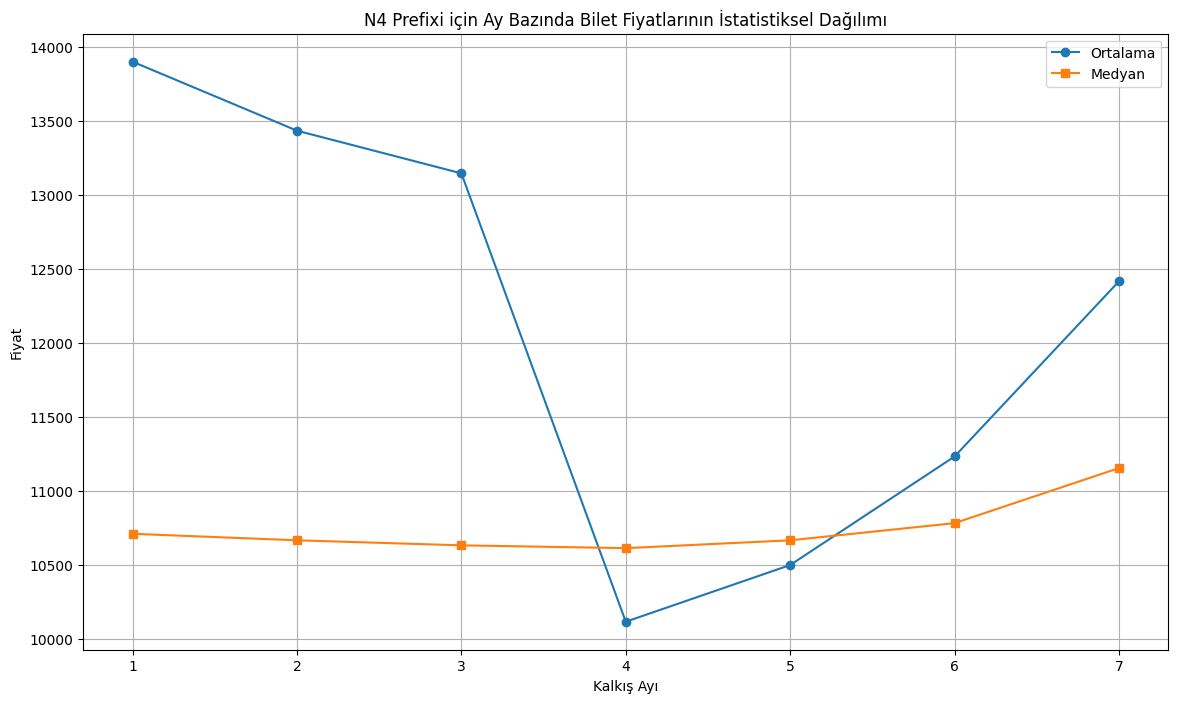

In [46]:
import matplotlib.pyplot as plt

# Grafik boyutunu ayarla
plt.figure(figsize=(14, 8))

# Ortalama için çizgi grafiği
plt.plot(result['Dep_Month'], result['mean'], label='Ortalama', marker='o')

# Median için çizgi grafiği
plt.plot(result['Dep_Month'], result['median'], label='Medyan', marker='s')

# Minimum için çizgi grafiği
#plt.plot(result['Dep_Month'], result['min'], label='Minimum', marker='^')

# Maksimum için çizgi grafiği
#plt.plot(result['Dep_Month'], result['max'], label='Maksimum', marker='v')

# Başlık ve eksen etiketleri
plt.title(f'{prefix} Prefixi için Ay Bazında Bilet Fiyatlarının İstatistiksel Dağılımı')
plt.xlabel('Kalkış Ayı')
plt.ylabel('Fiyat')
plt.xticks(result['Dep_Month'])  # X eksenindeki tüm ayları göster
plt.legend()

# Grafikleri göster
plt.grid(True)
plt.show()


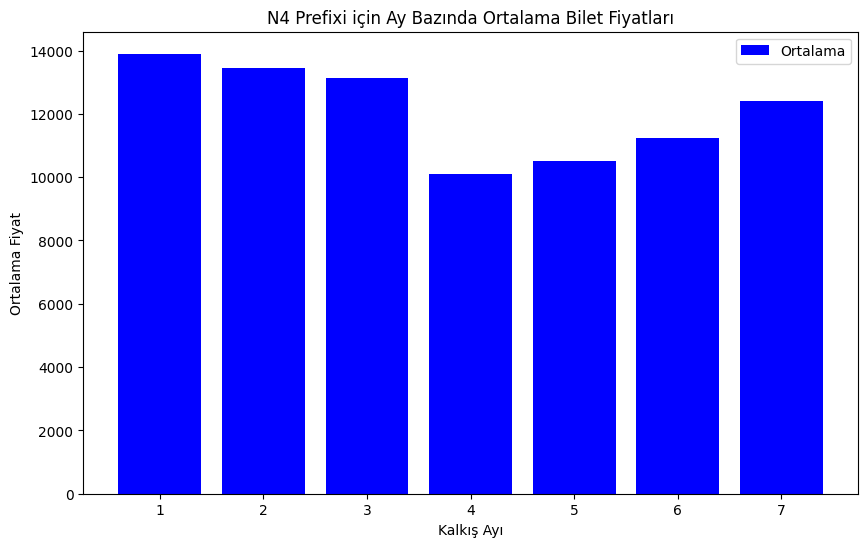

In [52]:
# Ortalama fiyatlar için bar grafik
plt.figure(figsize=(10, 6))
plt.bar(result['Dep_Month'], result['mean'], color='blue', label='Ortalama')
plt.xlabel('Kalkış Ayı')
plt.ylabel('Ortalama Fiyat')
plt.title(f'{prefix} Prefixi için Ay Bazında Ortalama Bilet Fiyatları')
plt.legend()
plt.show()



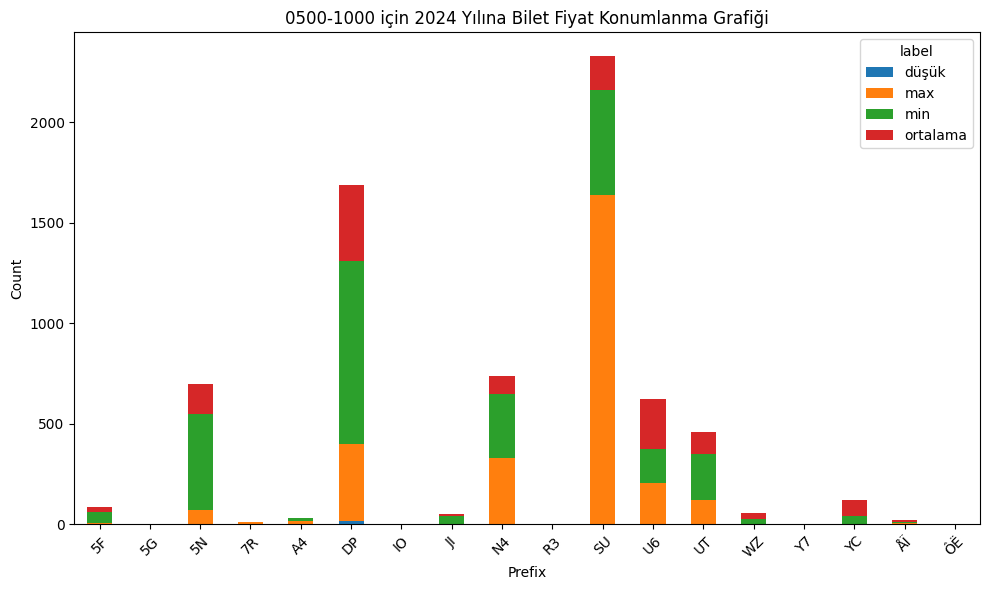

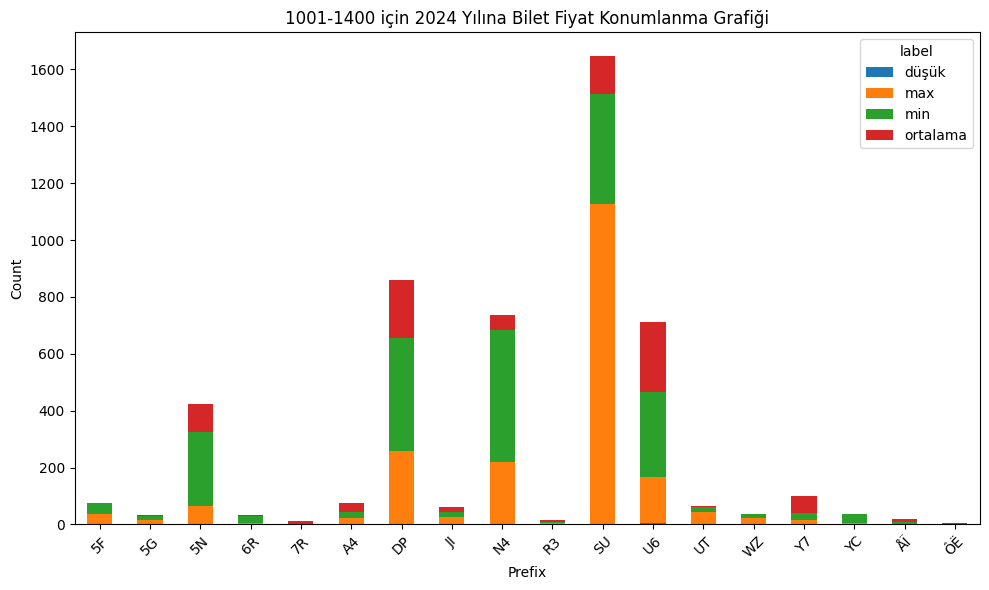

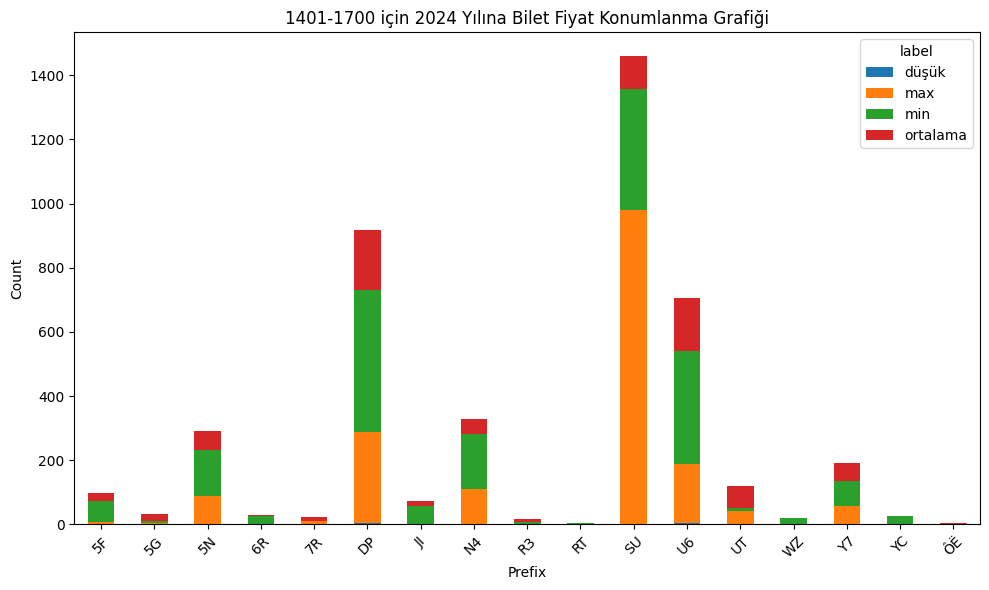

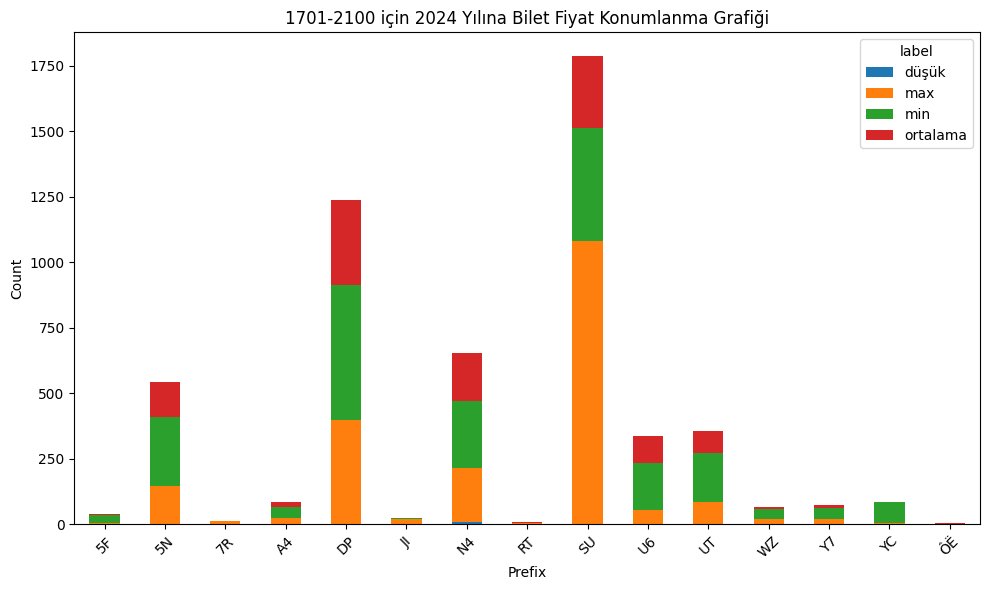

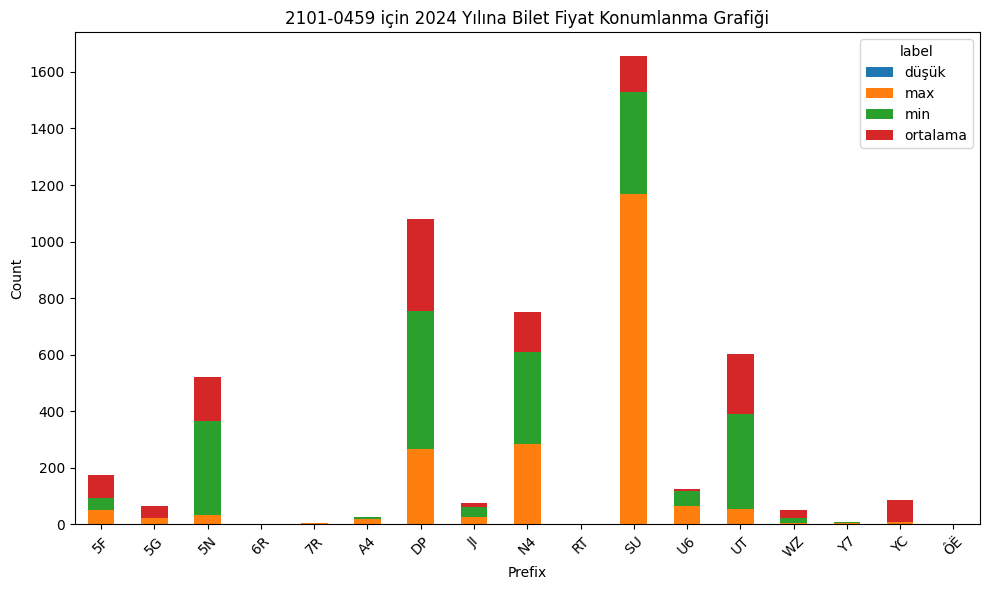

In [21]:
import matplotlib.pyplot as plt

# TOD'ye göre gruplama ve her bir grup için grafik çizdirme
for tod, group_data in filtered_data_diff.groupby('TOD'):
    # Her bir Prefix için label sayımı yap
    label_counts = group_data.groupby(['Prefix'])['label'].value_counts().unstack(fill_value=0)
    
    # Distribüsyon grafiği oluştur
    label_counts.plot(kind='bar', stacked=True, figsize=(10,6))
    plt.title(f'{tod} için 2024 Yılına Bilet Fiyat Konumlanma Grafiği')
    plt.xlabel('Prefix')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Grafik ve sayım tablosunu göster
    plt.show()


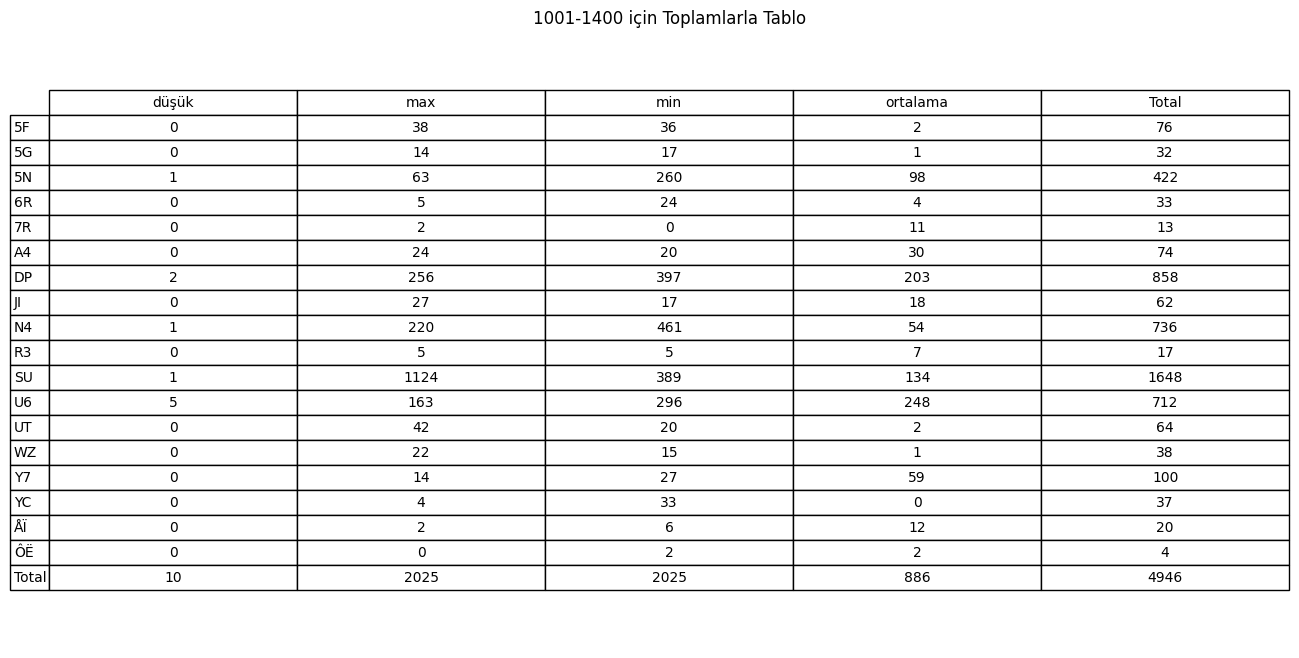

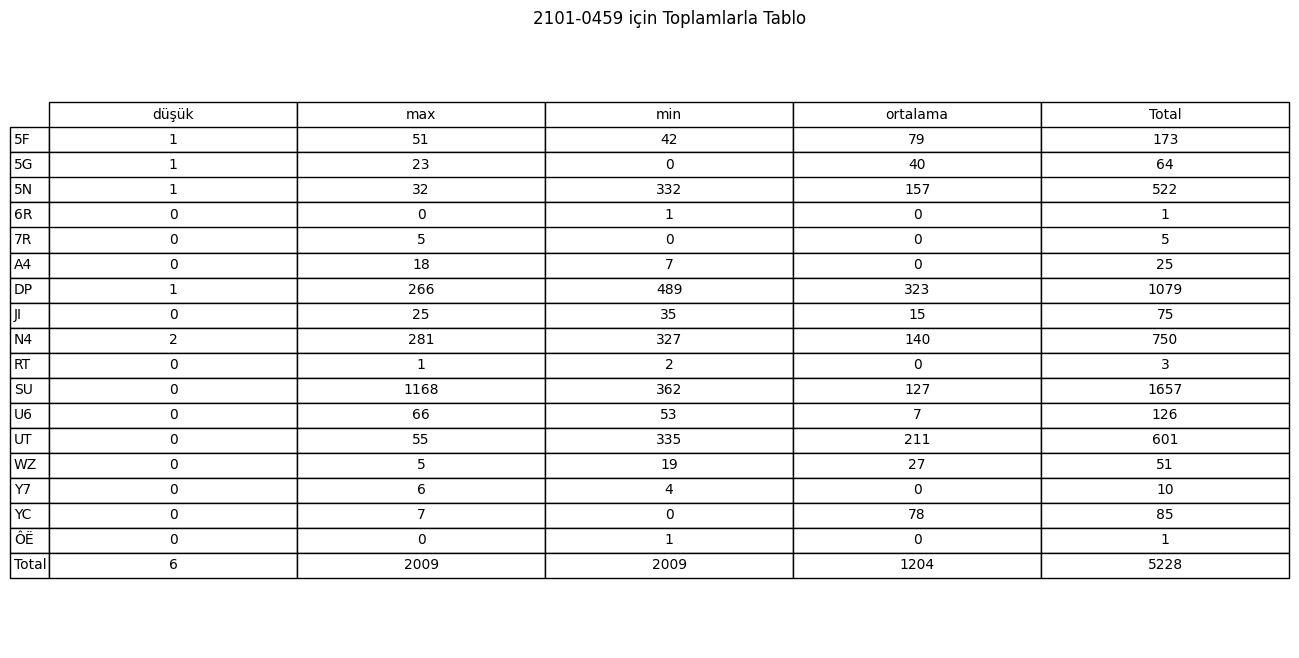

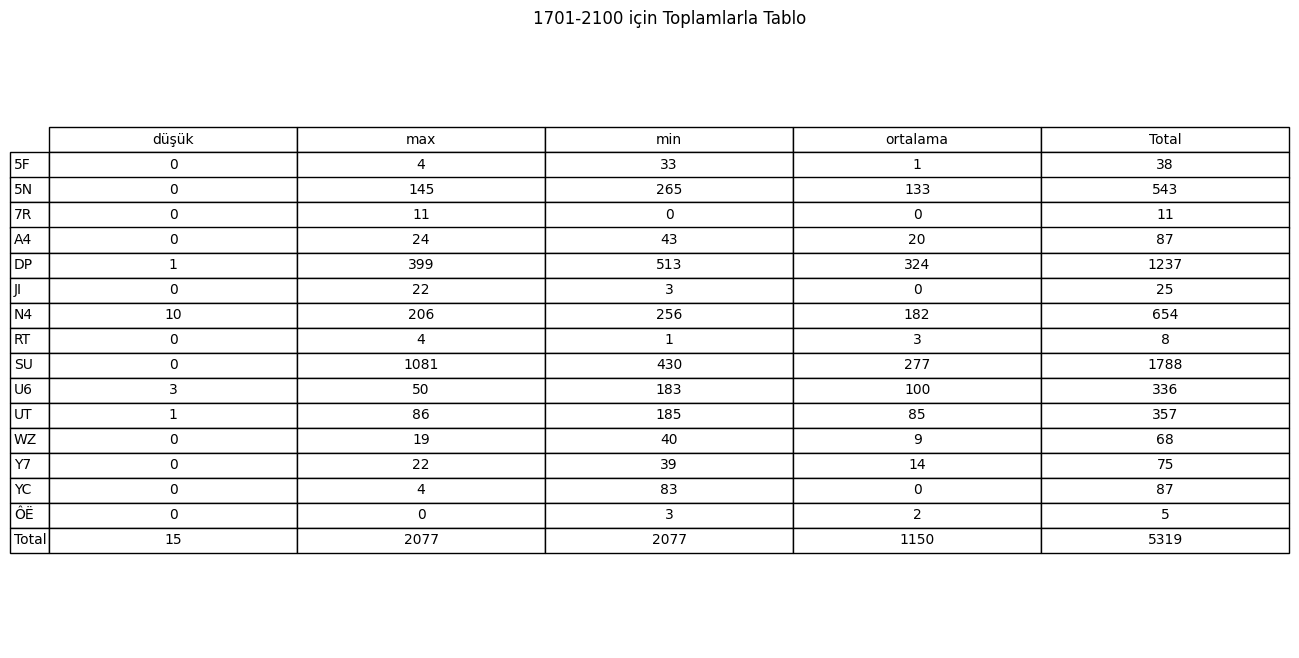

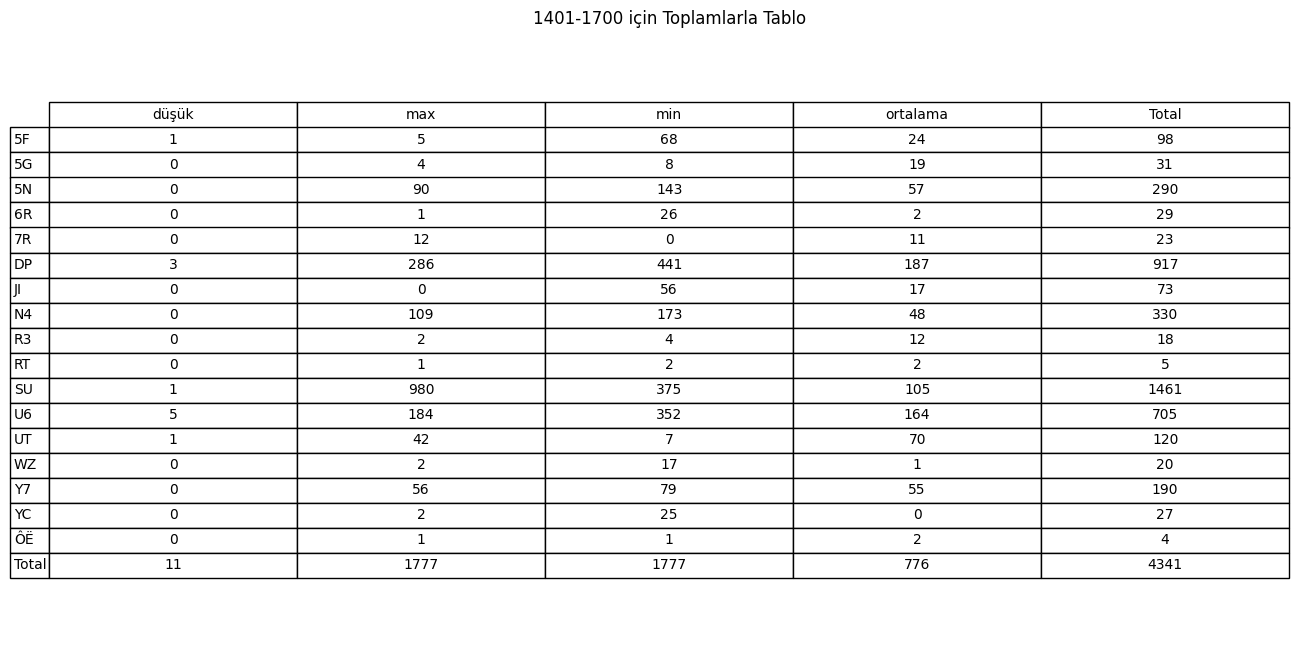

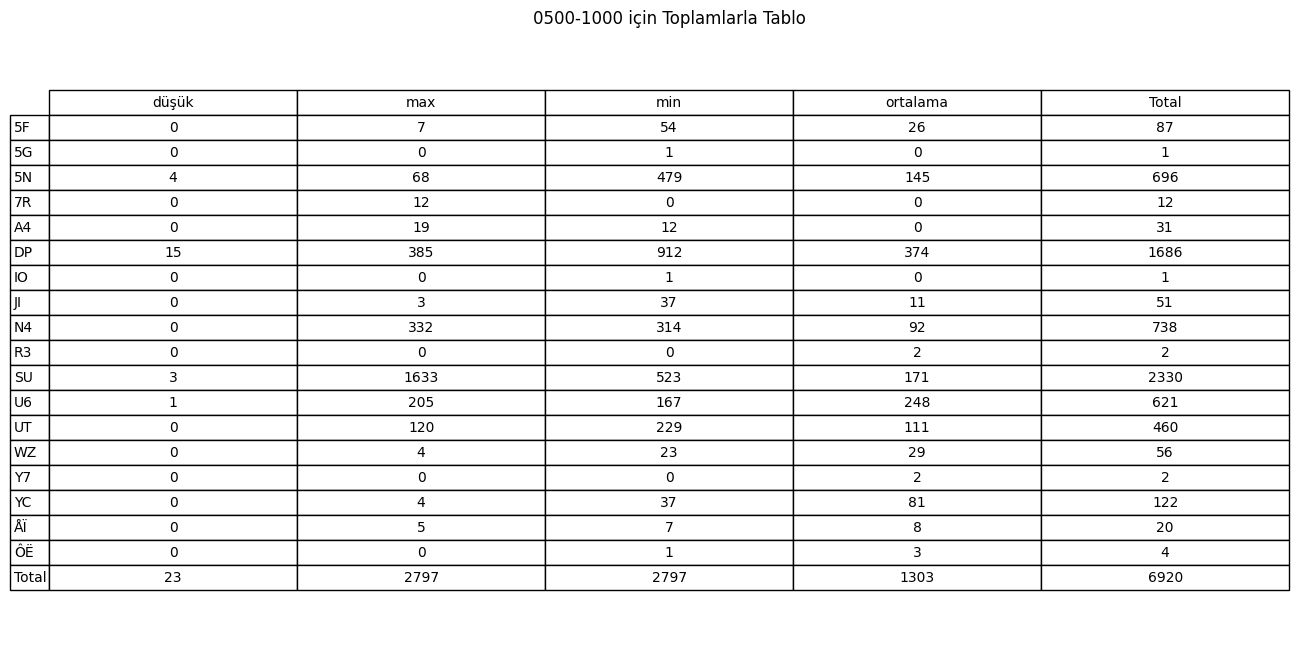

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Örnek veri seti (filtered_data_diff) ve TOD, Prefix, label kombinasyonları varsayılmıştır.
# Bu örnekte, filtered_data_diff DataFrame'i yerine doğrudan oluşturulmuş bir DataFrame kullanacağız.

# Her bir TOD için tablo oluşturma ve toplamları ekleme
for tod in filtered_data_diff['TOD'].unique():
    group_data = filtered_data_diff[filtered_data_diff['TOD'] == tod]
    
    # Her bir Prefix için label sayımı yap
    label_counts = group_data.groupby(['Prefix'])['label'].value_counts().unstack(fill_value=0)
    
    # Toplamları ekle (satır ve sütun toplamları)
    label_counts.loc['Total'] = label_counts.sum()
    label_counts['Total'] = label_counts.sum(axis=1)
    
    # Tablo oluşturma
    fig, ax = plt.subplots(figsize=(8, 8))  # Tablo boyutunu ayarla
    ax.axis('tight')
    ax.axis('off')
    ax.set_title(f'{tod} için Toplamlarla Tablo')
    table = ax.table(cellText=label_counts.values, colLabels=label_counts.columns, rowLabels=label_counts.index, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)  # Font boyutunu ayarla
    table.scale(2, 1.5)  # Tablonun boyutunu ayarla




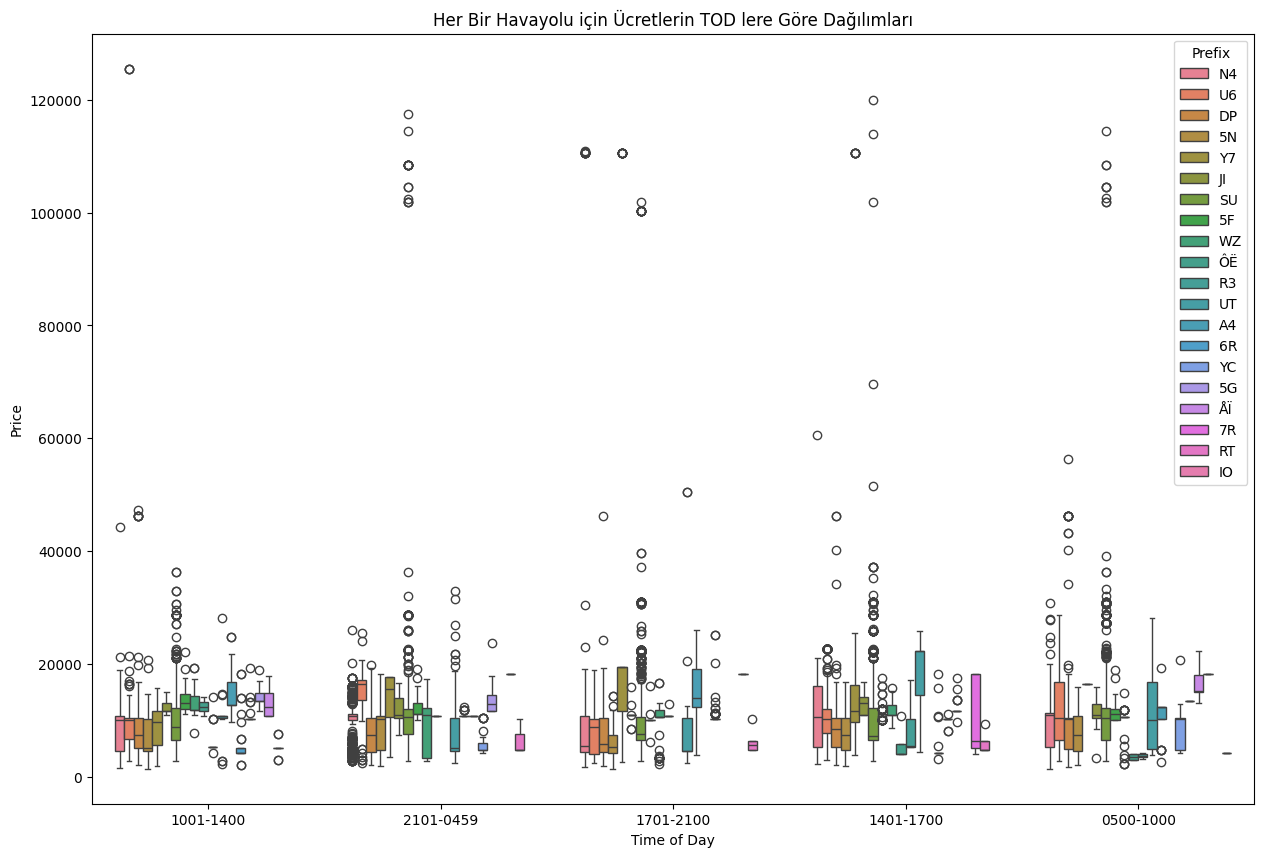

In [54]:
import seaborn as sns



# Box plot çizimi
plt.figure(figsize=(15,10))
sns.boxplot(x='TOD', y='price', hue ='Prefix', data=filtered_data_diff)

plt.title('Her Bir Havayolu için Ücretlerin TOD lere Göre Dağılımları')
plt.xlabel('Time of Day')
plt.ylabel('Price')
plt.legend(title='Prefix')

plt.show()


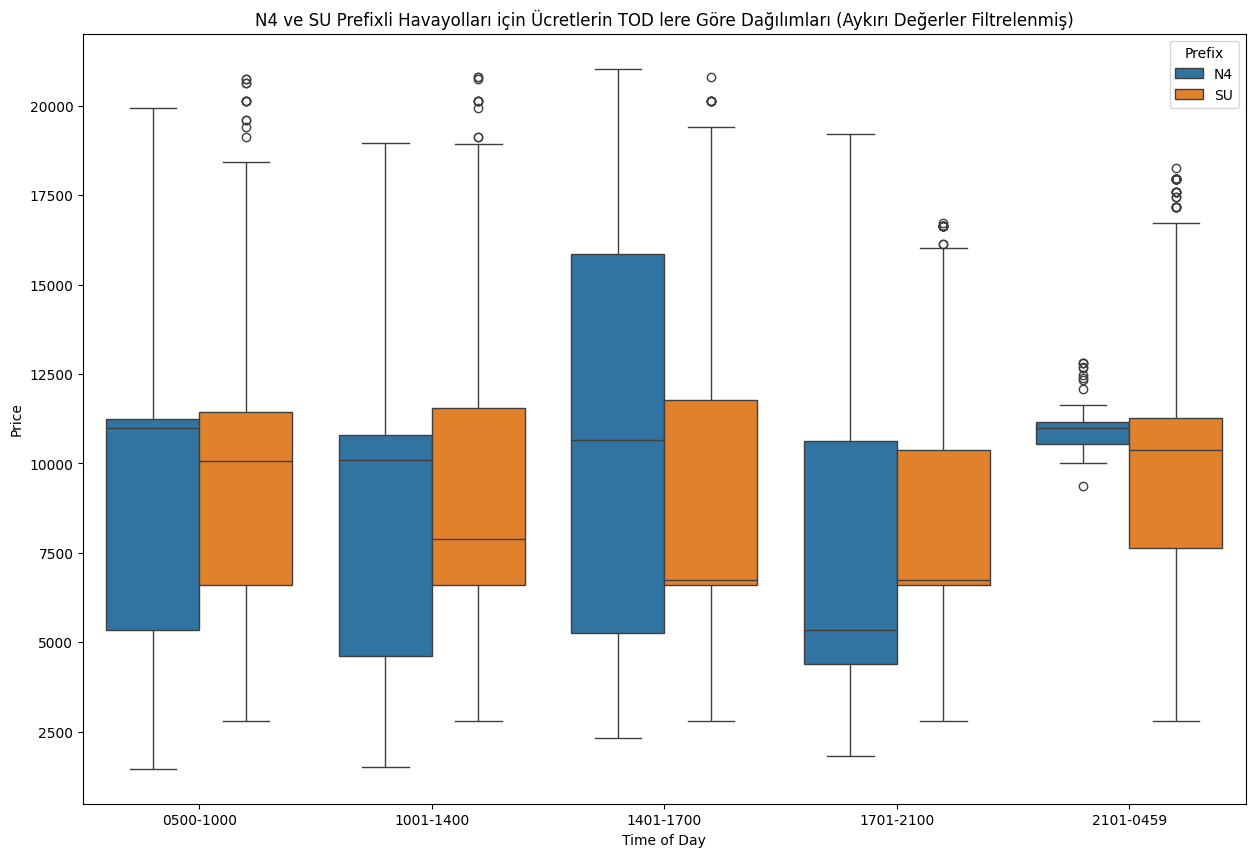

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# filtered_data_diff DataFrame'ini varsayıyoruz. 'price' sütunu ile 'TOD' ve 'Prefix' sütunları mevcut.
# İlk olarak, ilgilenilen prefixler için veri setini filtreleyelim.
interested_prefixes = ['N4', 'SU']
filtered_data_diff = filtered_data_diff[filtered_data_diff['Prefix'].isin(interested_prefixes)]

# Aykırı değerleri filtreleme işlemi
def remove_outliers(df):
    Q1 = df['price'].quantile(0.25)
    Q3 = df['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# 'TOD' ve 'Prefix' kombinasyonları için aykırı değerleri filtrele
filtered_data_clean = pd.DataFrame()  # Temiz veri için boş bir DataFrame oluştur
for (tod, prefix), group_data in filtered_data_diff.groupby(['TOD', 'Prefix']):
    filtered_group = remove_outliers(group_data)
    filtered_data_clean = pd.concat([filtered_data_clean, filtered_group], axis=0)

# Box plot çizimi, temizlenmiş veri ile
plt.figure(figsize=(15,10))
sns.boxplot(x='TOD', y='price', hue='Prefix', data=filtered_data_clean)

plt.title('N4 ve SU Prefixli Havayolları için Ücretlerin TOD lere Göre Dağılımları (Aykırı Değerler Filtrelenmiş)')
plt.xlabel('Time of Day')
plt.ylabel('Price')
plt.legend(title='Prefix')

plt.show()



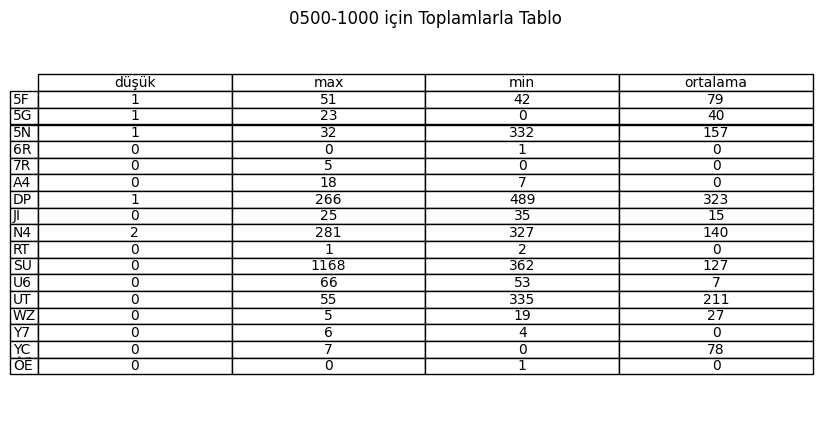

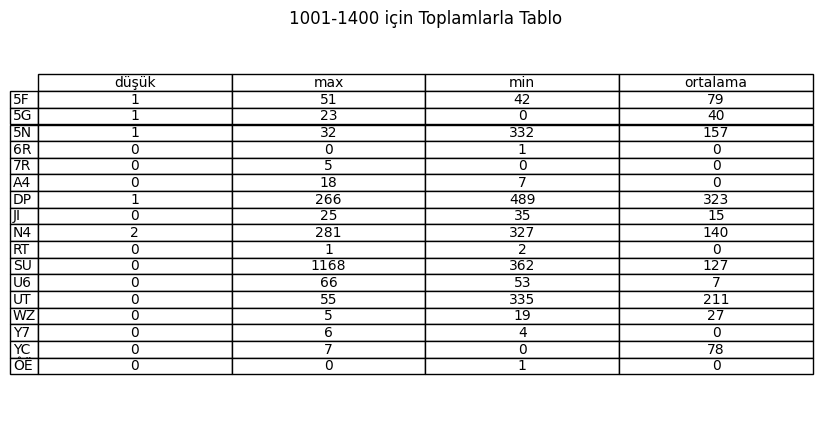

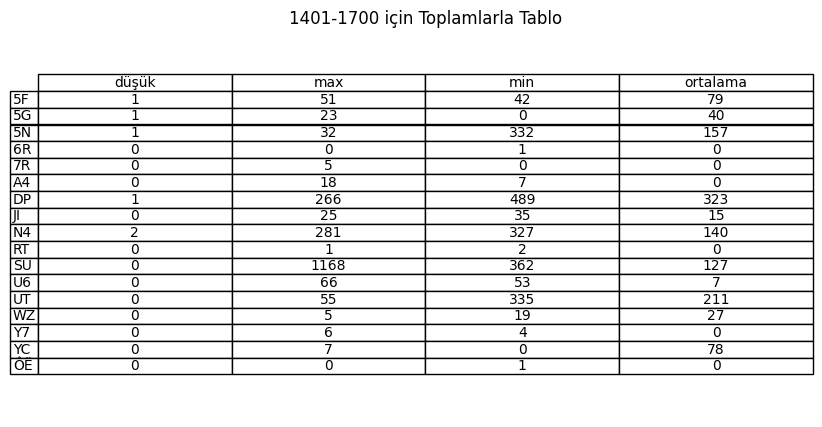

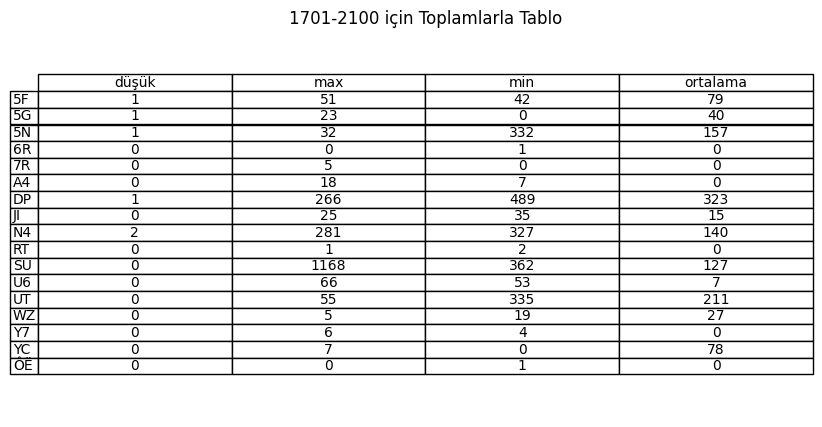

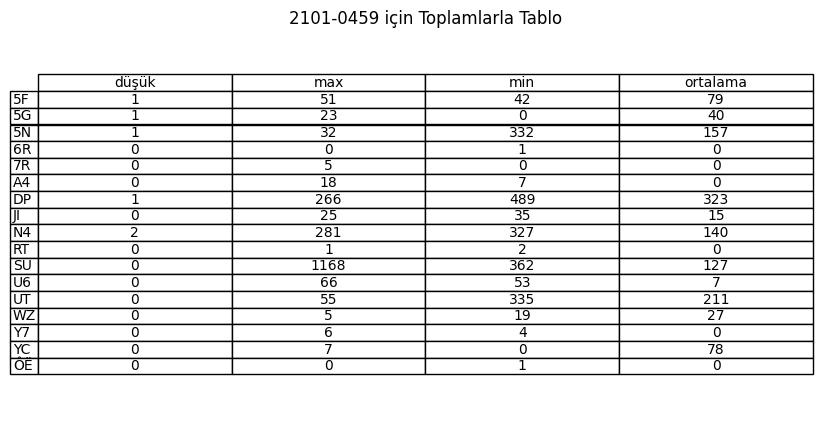

In [28]:

# Tablo oluşturma
for tod, group_data in filtered_data_diff.groupby('TOD'):
    fig, ax = plt.subplots(figsize=(10, 5))  # Tablo boyutunu ayarla
    ax.axis('tight')
    ax.axis('off')
    ax.table(cellText=label_counts.values, colLabels=label_counts.columns, rowLabels=label_counts.index, cellLoc='center', loc='center')
    ax.set_title(f'{tod} için Toplamlarla Tablo')
    plt.show()


In [19]:
merged_data_with_sorted.to_csv("data3.csv", index=False)  # "index=False" to avoid exporting the row index

In [12]:
# Ensure 'Dep_Date' is in datetime format
grouped_data_sorted['Dep_Date'] = pd.to_datetime(grouped_data_sorted['Dep_Date'])

# Extract month and day of week from 'Dep_Date' and create new columns in the DataFrame
grouped_data_sorted['Dep_Month'] = grouped_data_sorted['Dep_Date'].dt.month
grouped_data_sorted['Dep_DayOfWeek'] = grouped_data_sorted['Dep_Date'].dt.day_name()

# Display the first few rows of the dataframe to confirm the new columns are added
grouped_data_sorted.head()


,Dep_Date,ond,Prefix,Number,coll_date,Price,Dep_Month,Dep_DayOfWeek
0,2024-10-10,AER-CEK,U6,619,2023-11-25,12800,10,Thursday
1,2024-10-10,AER-CEK,U6,619,2023-11-28,12800,10,Thursday
2,2024-10-10,AER-CEK,U6,619,2023-12-02,12800,10,Thursday
3,2024-10-10,AER-CEK,U6,619,2023-12-05,12800,10,Thursday
4,2024-10-10,AER-CEK,U6,619,2023-12-07,12800,10,Thursday


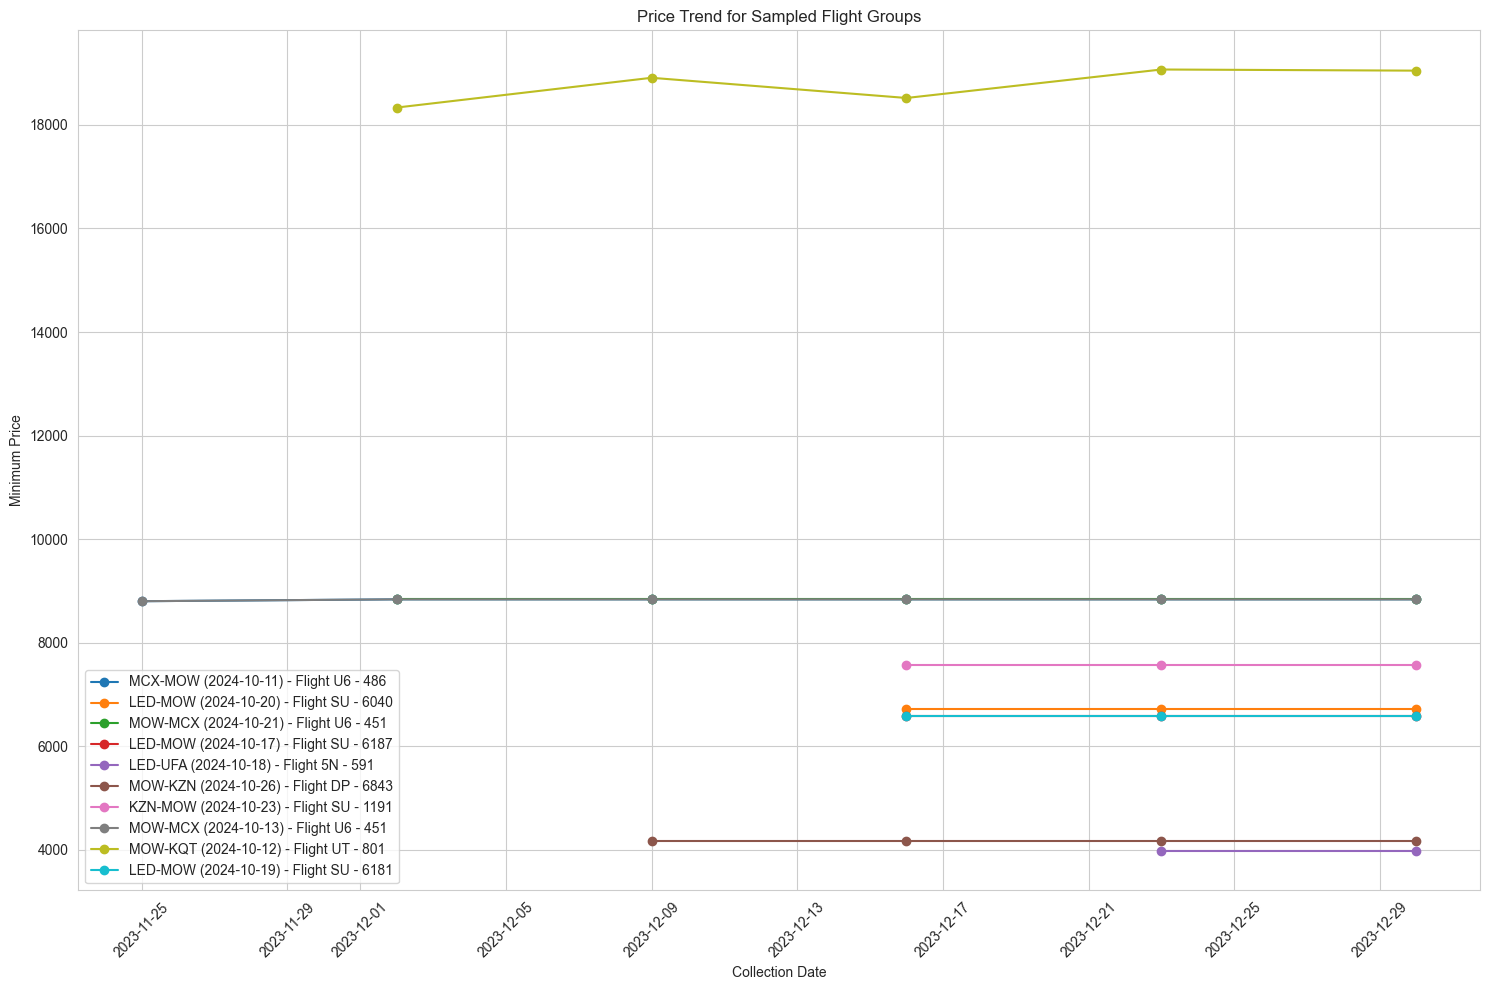

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Sample a few groups to visualize
sampled_groups = grouped_data_sorted.groupby(['Dep_Date', 'ond', 'Prefix', 'Number']).apply(lambda x: x.name).sample(10)

# Initialize the plot
plt.figure(figsize=(15, 10))

# Loop through the sampled groups and plot each one
for group in sampled_groups:
    # Filter data for the current group
    group_data = grouped_data_sorted[(grouped_data_sorted['Dep_Date'] == group[0]) & 
                                     (grouped_data_sorted['ond'] == group[1]) & 
                                     (grouped_data_sorted['Prefix'] == group[2])&
                                     (grouped_data_sorted['Number'] == group[3])]
                                     
    
    # Plotting the price trend for the current group
    plt.plot(group_data['coll_date'], group_data['Price'], marker='o', label=f'{group[1]} ({group[0].strftime("%Y-%m-%d")}) - Flight {group[2]} - {group[3]}')

# Configure plot
plt.title('Price Trend for Sampled Flight Groups')
plt.xlabel('Collection Date')
plt.ylabel('Minimum Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


In [14]:
grouped_data_sorted.to_excel("data1.xlsx", index=False)  # "index=False" to avoid exporting the row index

In [18]:
# Compute summary statistics for each flight group
summary_statistics = grouped_data_sorted.groupby(['Dep_Month', 'ond','Prefix', 'Number'])['Price'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()

#Display the summary statistics for the first few flight groups
summary_statistics.head()

#summary_statistics.to_excel('summary_statistics.xlsx', index = False)


,Dep_Month,ond,Prefix,Number,mean,median,std,min,max
0,10,AER-BAX,N4,487,14908.454545,14913.0,21.320072,14813,14913
1,10,AER-CEK,5N,815,12570.000000,12570.0,0.000000,12570,12570
2,10,AER-CEK,DP,323,14993.354839,13774.0,1474.425748,12574,17274
3,10,AER-CEK,N4,505,12626.428571,12795.0,466.832376,11495,12855
4,10,AER-CEK,U6,619,12800.000000,12800.0,0.000000,12800,12800


In [17]:
from sklearn.linear_model import LinearRegression
import numpy as np
import datetime

# Re-initialize the trend_analysis_results DataFrame to ensure it's correctly set up
trend_analysis_results = pd.DataFrame(columns=['Dep_Date', 'ond','Prefix', 'Number', 'slope', 'intercept'])

# Linear Regression Model
model = LinearRegression()

# Initialize an empty list to store the trend analysis results
trend_analysis_data = []

# Perform trend analysis for each flight group
for (dep_date, ond, prefix, number), group_data in grouped_data_sorted.groupby(['Dep_Date', 'ond', 'Prefix','Number']):
    # Prepare the data for regression model
    X = group_data['coll_date'].map(datetime.datetime.toordinal).values.reshape(-1, 1)  # Convert dates to ordinal
    y = group_data['Price'].values
    
    # Fit the linear regression model
    model.fit(X, y)
    
    # Extract the slope (coef) and intercept
    slope = model.coef_[0]
    intercept = model.intercept_
    
    # Append the results to the list as a dictionary
    trend_analysis_data.append({
        'Dep_Date': dep_date, 
        'ond': ond, 
        'Prefix': prefix,
        'Number': number, 
        'slope': slope, 
        'intercept': intercept
    })

# Create a DataFrame from the list of dictionaries
trend_analysis_results = pd.DataFrame(trend_analysis_data)

# Display the results for the first few flight groups
trend_analysis_results.head()


,Dep_Date,ond,Prefix,Number,slope,intercept
0,2024-10-10,AER-CEK,U6,619,0.000000,1.280000e+04
1,2024-10-10,AER-KJA,N4,475,0.000000,1.727800e+04
2,2024-10-10,AER-KJA,SU,6876,-51.428571,3.802221e+07
3,2024-10-10,AER-KUF,DP,331,0.000000,1.147400e+04
4,2024-10-10,AER-KZN,DP,337,0.000000,1.427400e+04


In [13]:
trend_analysis_results.to_excel('trend_result.xlsx', index = False)

In [22]:
# Compute summary statistics for each 'ond' and 'Dep_Month' pair
monthly_stats = grouped_data_sorted.groupby(['ond', 'Dep_Month'])['Price'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()

# Compute summary statistics for each 'ond' and 'Dep_DayOfWeek' pair
dow_stats = grouped_data_sorted.groupby(['ond', 'Dep_DayOfWeek'])['Price'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()

# Display the first few rows of the monthly and day of week statistics
monthly_stats.head()


,ond,Dep_Month,mean,median,std,min,max
0,AER-KEJ,10,14317.0,14317.0,0.0,14317,14317
1,BAX-LED,10,10008.0,10008.0,0.0,10008,10008
2,KEJ-AER,10,11917.0,11917.0,0.0,11917,11917
3,KGD-KZN,10,10631.0,10631.0,0.0,10631,10631
4,KGD-MOW,10,5774.0,5774.0,0.0,5774,5774


In [23]:
 dow_stats.head()

,ond,Dep_DayOfWeek,mean,median,std,min,max
0,AER-KEJ,Saturday,14317.0,14317.0,0.0,14317,14317
1,BAX-LED,Sunday,10008.0,10008.0,0.0,10008,10008
2,KEJ-AER,Sunday,11917.0,11917.0,0.0,11917,11917
3,KGD-KZN,Saturday,10631.0,10631.0,0.0,10631,10631
4,KGD-MOW,Saturday,5774.0,5774.0,0.0,5774,5774
